In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from my_utils import load_data
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense, Dropout
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from sklearn.cluster import KMeans

In [18]:
X, session_df, requests_df = load_data(csv_path='output.log', req_thres=5, normalize_feat=True)

LOADING THE DATASET...


Skipping line 601729: Expected 7 fields in line 601729, saw 23. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.


DATASET HAS BEEN LOADED SUCESSFULLY!


In [21]:
X['is_bot'] = X['is_bot'].astype(int)
X['is_pc'] = X['is_pc'].astype(int)

to_model_cols = X.columns[:14]
X_train = X[to_model_cols].copy()

print('X_train shape: {}'.format(X_train.shape))

X_train shape: (31541, 14)


In [22]:
X_train.columns

Index(['requests_count', 'path_length_std', '4xx_percentage(%)',
       '3xx_percentage(%)', 'HEAD_count(%)', 'image_count(%)',
       'total_response_length', 'mean_response_length', 'total_response_time',
       'mean_response_time', 'avg_path_count_norm', 'is_bot', 'is_pc',
       'avg_time_diff'],
      dtype='object')

# Clustring using Kmeans

In [41]:
X_train.drop(columns=['cluster'], axis=1, inplace=True)

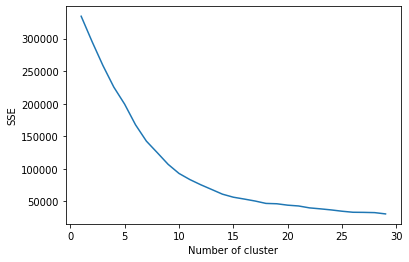

In [42]:
sse = {}
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, max_iter=500).fit(X_train)
    X_train["cluster"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

So the best *K* is 10.

In [48]:
X_train.drop(columns=['cluster'], axis=1, inplace=True)

best_k = 10

kmeans = KMeans(n_clusters=best_k, max_iter=1000).fit(X_train)
X_train["cluster"] = kmeans.labels_

In [65]:
X_train[X_train['cluster'] == 2].head(50)

requests_count  \
ip              user_agent                                                           
100.92.35.41    Mozilla/5.0 (Linux; Android 9; SM-A205F) AppleW...       -0.080424   
102.0.232.185   Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...       -0.068175   
102.105.238.190 Mozilla/5.0 (Linux; Android 10; SM-A107F) Apple...        0.152304   
102.113.23.217  Mozilla/5.0 (Linux; Android 10; SM-A207F) Apple...        0.060438   
102.15.174.47   Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...        0.094122   
102.221.167.35  MoziIIa/5.0 (X11; Linux x86_64) app_version: 581          0.039002   
                okhttp/3.12.1                                             0.017567   
102.221.194.68  MoziIIa/5.0 (X11; Linux x86_64) app_version: 581         -0.083486   
102.221.198.20  MoziIIa/5.0 (X11; Linux x86_64) app_version: 581         -0.086548   
102.226.142.23  Mozilla/5.0 (Linux; Android 8.0.0; SAMSUNG SM-A...        0.039002   
102.24.98.224   Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-J...       -0.019180   
102.29.29.19    MoziIIa/5.0 (X11; Linux x86_64) app_version: 581         -0.052864   
                okhttp/3.12.1                                            -0.055926   
102.29.9.108    Mozilla/5.0 (Linux; Android 10; SM-A105F) Apple...       -0.016118   
102.43.168.162  Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...       -0.013055   
102.57.224.83   Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-J...       -0.025304   
102.86.247.131  MoziIIa/5.0 (X11; Linux x86_64) app_version: 581         -0.077362   
102.86.253.150  MoziIIa/5.0 (X11; Linux x86_64) app_version: 581         -0.083486   
102.86.253.89   okhttp/3.12.1                                            -0.034491   
102.90.17.86    Mozilla/5.0 (Linux; Android 9; SM-N950F) AppleW...       -0.058988   
102.90.2.240    Mozilla/5.0 (iPhone; CPU iPhone OS 14_4_1 like ...        0.060438   
102.93.72.182   Mozilla/5.0 (Linux; Android 8.1.0; DUB-LX1) App...        0.124744   
106.111.183.119 Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...        0.124744   
106.171.238.186 Mozilla/5.0 (Linux; Android 8.1.0; SM-J410F Bui...        0.045127   
106.225.79.183  Mozilla/5.0 (Linux; Android 10; 5028Y_EEA) Appl...       -0.022242   
107.169.198.163 okhttp/3.12.1                                            -0.049802   
109.165.215.198 FreshpingBot/1.0 (+https://freshping.io/)                 1.714029   
109.207.60.66   MoziIIa/5.0 (X11; Linux x86_64)                          -0.083486   
109.39.88.125   FreshpingBot/1.0 (+https://freshping.io/)                 1.710967   
11.221.180.173  Mozilla/5.0 (Linux; Android 10; SM-T295) AppleW...        0.109433   
11.221.180.234  Mozilla/5.0 (Linux; Android 6.0.1; SM-G532F) Ap...        0.026753   
11.239.52.253   MoziIIa/5.0 (X11; Linux x86_64) app_version: 581         -0.019180   
                okhttp/3.12.1                                            -0.065113   
111.178.236.189 Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:89...       -0.025304   
113.11.199.69   Mozilla/5.0 (Linux; Android 10; SM-A013G) Apple...        0.029816   
113.11.38.30    MoziIIa/5.0 (X11; Linux x86_64) app_version: 581         -0.052864   
113.111.0.229   Mozilla/5.0 (Linux; Android 6.0.1; Lenovo TB-77...       -0.013055   
113.111.101.66  Mozilla/5.0 (Linux; Android 11; SM-G975F) Apple...       -0.019180   
113.111.101.7   MoziIIa/5.0 (X11; Linux x86_64) app_version: 581         -0.083486   
113.111.103.254 MoziIIa/5.0 (X11; Linux x86_64) app_version: 581         -0.074299   
113.111.104.21  MoziIIa/5.0 (X11; Linux x86_64) app_version: 581         -0.083486   
113.111.122.167 Mozilla/5.0 (Linux; Android 9; SM-A505F) AppleW...        0.109433   
113.111.134.243 MoziIIa/5.0 (X11; Linux x86_64) app_version: 581         -0.065113   
113.111.173.36  Mozilla/5.0 (Linux; Android 8.0.0; SM-G570F) Ap...        0.029816   
113.111.176.241 Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleW...       -0.006931   
113.111.184.182 MoziIIa/5.

In [66]:
#ip = X_train.iloc[-2].ip
#ua = X_train.iloc[-2].user_agent

ip = '102.29.29.19'
ua = 'MoziIIa/5.0 (X11; Linux x86_64) app_version: 581' 

requests_df[(requests_df['ip'] == ip) & (requests_df['user_agent'] == ua)].sort_values('time_stamp', ascending=True).head(20)

,ip,time,method,status_code,path,response_length,user_agent,response_time,path_count_normalized,path_length,time_stamp
628959,102.29.29.19,2021-05-12 11:57:07+04:30,Put,200,api/v3/token,289,MoziIIa/5.0 (X11; Linux x86_64) app_version: 581,8.0,2.16266,3,1620804427
628960,102.29.29.19,2021-05-12 11:57:07+04:30,Put,200,api/v3/token,289,MoziIIa/5.0 (X11; Linux x86_64) app_version: 581,16.0,2.16266,3,1620804427
628962,102.29.29.19,2021-05-12 11:57:08+04:30,Put,200,api/v3/token,289,MoziIIa/5.0 (X11; Linux x86_64) app_version: 581,12.0,2.16266,3,1620804428
628964,102.29.29.19,2021-05-12 11:57:08+04:30,Put,200,api/v3/token,289,MoziIIa/5.0 (X11; Linux x86_64) app_version: 581,12.0,2.16266,3,1620804428
628965,102.29.29.19,2021-05-12 11:57:08+04:30,Put,200,api/v3/token,289,MoziIIa/5.0 (X11; Linux x86_64) app_version: 581,8.0,2.16266,3,1620804428
628966,102.29.29.19,2021-05-12 11:57:08+04:30,Put,200,api/v3/token,289,MoziIIa/5.0 (X11; Linux x86_64) app_version: 581,8.0,2.16266,3,1620804428
628967,102.29.29.19,2021-05-12 11:57:08+04:30,Put,200,api/v3/token,289,MoziIIa/5.0 (X11; Linux x86_64) app_version: 581,8.0,2.16266,3,1620804428
628968,102.29.29.19,2021-05-12 11:57:08+04:30,Put,200,api/v3/token,289,MoziIIa/5.0 (X11; Linux x86_64) app_version: 581,12.0,2.16266,3,1620804428
628973,102.29.29.19,2021-05-12 11:57:08+04:30,Put,200,api/v3/token,289,MoziIIa/5.0 (X11; Linux x86_64) app_version: 581,36.0,2.16266,3,1620804428
628979,102.29.29.19,2021-05-12 11:57:08+04:30,Put,200,api/v3/token,289,MoziIIa/5.0 (X11; Linux x86_64) app_version: 581,20.0,2.16266,3,1620804428
